In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/matchingscores.csv")
df

,Unnamed: 0,filename,result_50_features,distance_50_features,time_50_features,result_100_features,distance_100_features,time_100_features,result_200_features,distance_200_features,time_200_features,result_300_features,distance_300_features,time_300_features
0,0,20190217_110001.jpg,[],[],[],[],[],[],[],[],[],[],[],[]
1,1,20190217_104706.jpg,['zaal_2__IMG_20190323_112235__01.png'],[329.0],[0.2768612919999782],['zaal_2__IMG_20190323_112235__01.png'],[237.0],[0.2952983749999589],['zaal_2__IMG_20190323_112235__01.png'],[203.0],[0.4169997079999348],['zaal_2__IMG_20190323_112235__01.png'],[165.0],[0.5390496659999826]
2,2,20190217_104510.jpg,['zaal_6__IMG_20190323_112938__01.png'],[470.0],"[0.24806375000000003, 0.24814241699999684]","['zaal_6__IMG_20190323_112938__01.png', 'Zaal_...","[294.0, 905.0]","[0.28201783399998703, 0.2935176249999927]","['zaal_6__IMG_20190323_112938__01.png', 'zaal_...","[230.0, 678.0]","[0.41200175000005856, 0.40726679099998364]","['zaal_6__IMG_20190323_112938__01.png', 'zaal_...","[207.0, 544.0]","[0.5230352920000314, 0.515774040999986]"
3,3,20190217_105140.jpg,['zaal_5__IMG_20190323_112800__01.png'],[1382.0],[0.26245499999998856],['zaal_18__IMG_20190323_120704__01.png'],[429.0],[0.28619083299997783],['zaal_18__IMG_20190323_120704__01.png'],[317.0],[0.4157244589999891],['zaal_18__IMG_20190323_120704__01.png'],[304.0],[0.5265022080000108]
4,4,20190217_105829.jpg,['Zaal_M__20190323_123139__01.png'],[404.0],[0.23901558399998635],['Zaal_M__20190323_123139__01.png'],[330.0],[0.2730836250000266],['Zaal_M__20190323_123139__01.png'],[283.0],[0.40890779199992267],['Zaal_M__20190323_123139__01.png'],[244.0],[0.5252378750001299]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,20190217_103105.jpg,[],[],[],[],[],[],[],[],[],[],[],[]
232,232,20190217_110151.jpg,['Zaal_G__20190323_120351__01.png'],[505.0],[0.23930412499998965],['Zaal_G__20190323_120351__01.png'],[346.0],[0.2786704999999756],['Zaal_G__20190323_120351__01.png'],[292.0],[0.4143359170000167],['Zaal_G__20190323_120351__01.png'],[271.0],[0.5609456669999417]
233,233,20190217_102555.jpg,['zaal_19__IMG_20190323_121300__01.png'],[1072.0],[0.24450400000000627],['zaal_19__IMG_20190323_121300__01.png'],[538.0],[0.278391332999945],['zaal_19__IMG_20190323_121300__01.png'],[355.0],[0.4551981250000381],['zaal_19__IMG_20190323_121300__01.png'],[329.0],[0.548135375000129]
234,234,20190217_110623.jpg,['Zaal_M__20190323_123139__01.png'],[1281.0],[0.2422739170000341],['Zaal_C__20190323_112836__08.png'],[754.0],[0.27716470899997603],['Zaal_C__20190323_112836__08.png'],[590.0],[0.5905868749999854],['Zaal_C__20190323_112836__08.png'],[480.0],[0.5269227079998018]


In [92]:

def convert_descriptors(descriptors):
    descriptors = np.array(pd.read_json(descriptors), dtype=np.uint8)
    return descriptors


def convert_fvector(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float32)
    return descriptors


def convert_keypoints(keypoint_array):
    keypoints_result = []
    keypoint_array  =  np.array(pd.read_json(keypoint_array))
    for  p in keypoint_array:
        temp = cv2.KeyPoint(
            x=p[0][0],
            y=p[0][1],
            size=p[1],
            angle=p[2],
            response=p[3],
            octave=p[4],
            class_id=p[5],
        )
        keypoints_result.append(temp)
    return keypoints_result

In [93]:
db = pd.read_csv("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/keypoints.csv", ",")
# db['descriptors'] = db['descriptors'].apply(lambda x: convert_descriptors(x))
# db['keypoints'] = db['keypoints'].apply(lambda x: convert_keypoints(x))
db['fvector'] = db['fvector'].apply(lambda x: convert_fvector(x))

/Users/lennertsteyaert/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
db['fvector'].head()

0    [[0.025319321], [0.19909637], [1.0211221], [1....
1    [[0.0], [0.2957968], [0.75874186], [1.9020355]...
2    [[0.05815658], [0.13274843], [1.0250067], [2.2...
3    [[0.033386417], [0.066825934], [1.0996912], [2...
4    [[0.01642335], [0.20404491], [0.7372967], [1.6...
Name: fvector, dtype: object

In [100]:
from scipy.spatial import distance



#similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in db['fvector'] ]
similar_idx_cosine = [ distance.euclidean(vectors, feat) for feat in db['fvector'] ]

In [101]:
idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[1:6]

In [102]:
#print(idx_closest)
for name in db.iloc[idx_closest].id:
    print(name)

zaal_19__IMG_20190323_121537__06.png
zaal_19__IMG_20190323_121537__07.png
zaal_19__IMG_20190323_121523__03.png
zaal_19__IMG_20190323_121447__04.png
zaal_19__IMG_20190323_121622__05.png


In [120]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt

2022-05-17 15:40:57.906378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

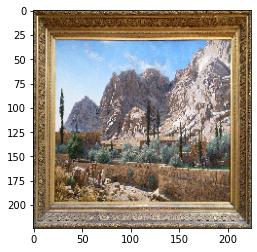

In [121]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()


def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [122]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [124]:
import pickle

images_path = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
image_extensions = ['.jpg', '.png', '.jpeg']

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
print(f"{len(images)} images to analyze")

features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print(f"Analyzing image {i} / {len(images)}...")
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0] # (1,4096)
    features.append(feat)

with open("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/features_similar_images.txt", "wb") as fp:
  pickle.dump(features, fp)

print('Finished extracting features for %d images' % len(images))

801 images to analyze
Analyzing image 0 / 801...
Analyzing image 500 / 801...
Finished extracting features for 801 images


In [140]:
with open("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/features_similar_images.txt", "rb") as fp:   # Unpickling
  features = pickle.load(fp)

In [126]:
# from sklearn.decomposition import PCA
# features = np.array(features)

# pca = PCA()
# data_reduced = pca.fit_transform(features)

# pca = PCA(n_components=650)
# pca.fit(features)

# pca_features = pca.transform(features)

14
613
187
314
520
333


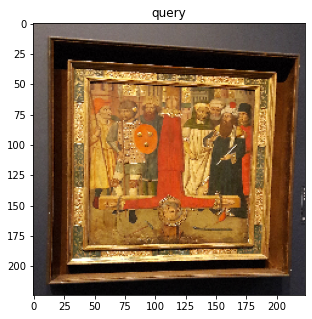

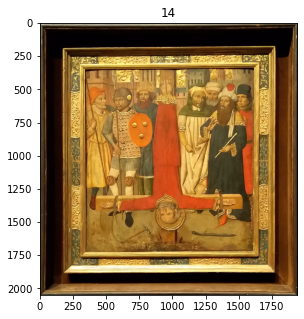

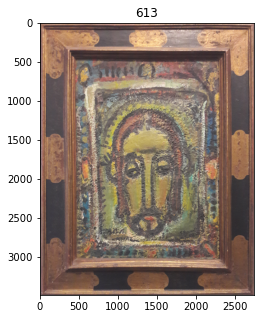

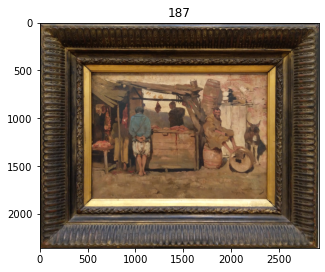

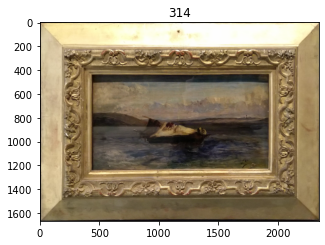

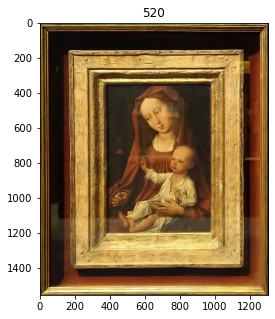

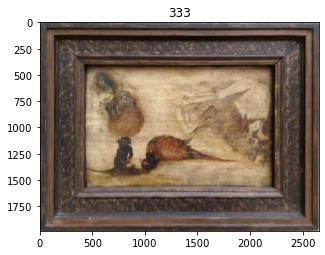

In [179]:
# grab a random query image


#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_1__IMG_20190323_111717__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_V__IMG_20190323_121823__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");


#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_110345.jpg");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");
img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");





vectors = feat_extractor.predict(x)[0] # (1,4096)Ò

# pca_features = pca.transform(feat)


similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in features ]

idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[0:6]

# for name in db.iloc[idx_closest].id:
#     print(name)

plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query")

for i in idx_closest:
    print(i)
    img = image.load_img(images[i])
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(str(i))


In [26]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class CustomResNet():
    def __init__(self):
        self.pretrained_model = VGG16(weights='imagenet', include_top=True)
        self.model = Model(inputs=self.pretrained_model.input, outputs=self.pretrained_model.get_layer("fc2").output)
    
    def get_feature_vector(self, img_path):
        # Reference

        img, x = self.load_image(img_path);
        feat = self.model.predict(x)[0]

        return feat


    def cosine_match(self,img,df):
        img_array = self.preprocess_convert(img)
        vectors = self.model.predict(img_array)[0]

        similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in df["fvector"]]
        idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[0:6]

        for i in idx_closest:
            print(i)
        
        return idx_closest

    def load_image(self, path):
        img = image.load_img(path, target_size=self.model.input_shape[1:3])
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x

    def preprocess_convert(self, img):
        img = image.smart_resize(img, self.model.input_shape[1:3])
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return x        
        

In [174]:

import json

DIRECTORY = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
directory_list = os.listdir(DIRECTORY)


featureMatcher = CustomResNet()
result = []


for file in directory_list:
    filename = os.fsdecode(file)
    img_path = DIRECTORY + "/" + filename
    print(img_path)

    # vector = featureMatcher.get_feature_vector(img_path)
    # print(vector)

    result.append({
        'id':filename,
        'fvector': json.dumps(featureMatcher.get_feature_vector(img_path).tolist())
    })

/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121622__09.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_S__IMG_20190323_122944__04.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121523__04.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121523__10.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_S__IMG_20190323_122748__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_15__IMG_20190323_115551__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_9__IMG_20190323_113745__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/Zaal_A__20190323_111313__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_18__IMG_20190323_120719__01.png


In [175]:
df = pd.DataFrame(result)
df.head()

,id,fvector
0,zaal_19__IMG_20190323_121622__09.png,"[0.35244137048721313, 0.14393076300621033, 0.0..."
1,zaal_S__IMG_20190323_122944__04.png,"[3.1343345642089844, 3.21919322013855, 0.0, 0...."
2,zaal_19__IMG_20190323_121523__04.png,"[7.578836917877197, 3.3183648586273193, 0.3332..."
3,zaal_19__IMG_20190323_121523__10.png,"[0.0, 0.0, 0.0, 0.0, 4.049309253692627, 0.0, 0..."
4,zaal_S__IMG_20190323_122748__01.png,"[1.7430344820022583, 1.0830790996551514, 0.254..."


In [4]:
df = pd.read_csv("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/keypoints.csv")
df.head()

,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_19__IMG_20190323_121622__09.png,"[[[755.0, 95.0], 31.0, 279.59832763671875, 0.0...","[[109, 129, 0, 203, 245, 189, 106, 186, 79, 81...",zaal_19,20190323_121622,9,"[0.35244137048721313, 0.14393076300621033, 0.0..."
1,1,zaal_S__IMG_20190323_122944__04.png,"[[[754.0, 311.0], 31.0, 165.23532104492188, 0....","[[169, 250, 63, 26, 105, 95, 19, 228, 249, 95,...",zaal_S,20190323_122944,4,"[3.1343345642089844, 3.21919322013855, 0.0, 0...."
2,2,zaal_19__IMG_20190323_121523__04.png,"[[[72.0, 720.0], 31.0, 313.84197998046875, 0.0...","[[168, 189, 121, 97, 244, 205, 113, 87, 115, 4...",zaal_19,20190323_121523,4,"[7.578836917877197, 3.3183648586273193, 0.3332..."
3,3,zaal_19__IMG_20190323_121523__10.png,"[[[768.0, 31.0], 31.0, 357.64996337890625, 0.0...","[[185, 91, 110, 237, 4, 14, 231, 117, 84, 76, ...",zaal_19,20190323_121523,10,"[0.0, 0.0, 0.0, 0.0, 4.049309253692627, 0.0, 0..."
4,4,zaal_S__IMG_20190323_122748__01.png,"[[[221.0, 395.0], 31.0, 46.401771545410156, 0....","[[42, 190, 102, 152, 255, 177, 184, 199, 159, ...",zaal_S,20190323_122748,1,"[1.7430344820022583, 1.0830790996551514, 0.254..."


In [10]:
def convert_fvector(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float64)
    return descriptors


df['fvector'] = df['fvector'].apply(lambda x: convert_fvector(x))    

In [11]:
df.head()

,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_19__IMG_20190323_121622__09.png,"[[[755.0, 95.0], 31.0, 279.59832763671875, 0.0...","[[109, 129, 0, 203, 245, 189, 106, 186, 79, 81...",zaal_19,20190323_121622,9,"[[0.352441370487213], [0.14393076300621002], [..."
1,1,zaal_S__IMG_20190323_122944__04.png,"[[[754.0, 311.0], 31.0, 165.23532104492188, 0....","[[169, 250, 63, 26, 105, 95, 19, 228, 249, 95,...",zaal_S,20190323_122944,4,"[[3.134334564208984], [3.21919322013855], [0.0..."
2,2,zaal_19__IMG_20190323_121523__04.png,"[[[72.0, 720.0], 31.0, 313.84197998046875, 0.0...","[[168, 189, 121, 97, 244, 205, 113, 87, 115, 4...",zaal_19,20190323_121523,4,"[[7.578836917877197], [3.318364858627319], [0...."
3,3,zaal_19__IMG_20190323_121523__10.png,"[[[768.0, 31.0], 31.0, 357.64996337890625, 0.0...","[[185, 91, 110, 237, 4, 14, 231, 117, 84, 76, ...",zaal_19,20190323_121523,10,"[[0.0], [0.0], [0.0], [0.0], [4.04930925369262..."
4,4,zaal_S__IMG_20190323_122748__01.png,"[[[221.0, 395.0], 31.0, 46.401771545410156, 0....","[[42, 190, 102, 152, 255, 177, 184, 199, 159, ...",zaal_S,20190323_122748,1,"[[1.743034482002258], [1.083079099655151], [0...."


In [12]:
# img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");


def preprocess_convert(img):
    img = image.smart_resize(img, featureMatcher.model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x        
        

featureMatcher = CustomResNet()

img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg")

#preprocess_convert(img)

featureMatcher.cosine_match(img,df)

14
733
187
613
726
322


261
344
707
7
720
674


Text(0.5, 1.0, 'result')

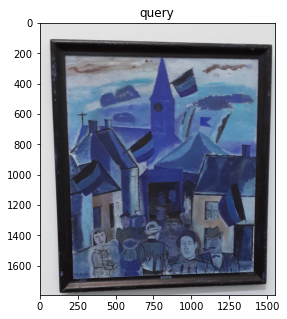

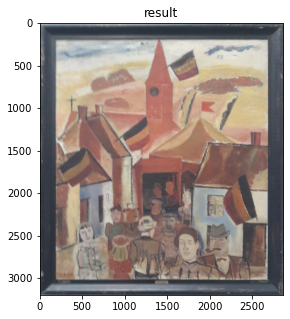

In [29]:

DIRECTORY = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
directory_list = os.listdir(DIRECTORY)



#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_1__IMG_20190323_111717__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_V__IMG_20190323_121823__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");


img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_110345.jpg");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");

#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg")

featureMatcher = CustomResNet()
sim_indexes = featureMatcher.cosine_match(img,df)

plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query")

img_path = os.path.join(DIRECTORY, str(df.iloc[sim_indexes[0]].id))
img = image.load_img(img_path)


plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("result")